# Logistic Regression

Here we use the cancer dataset to learn logistic regression.

## Data Exploration

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import load_breast_cancer
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [5]:
dataset = load_breast_cancer()
data = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
data['cancer'] = [dataset.target_names[t] for t in dataset.target]


In [4]:
print(dataset.target_names)

['malignant' 'benign']


In [5]:
data[18:28]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
18,19.810,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,0.05395,...,30.88,186.80,2398.0,0.1512,0.3150,0.53720,0.23880,0.2768,0.07615,malignant
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,19.26,99.70,711.2,0.1440,0.1773,0.23900,0.12880,0.2977,0.07259,benign
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,0.06811,...,20.49,96.09,630.5,0.1312,0.2776,0.18900,0.07283,0.3184,0.08183,benign
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905,...,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773,benign
22,15.340,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.09756,0.2521,0.07032,...,19.08,125.10,980.9,0.1390,0.5954,0.63050,0.23930,0.4667,0.09946,malignant
23,21.160,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.08632,0.1769,0.05278,...,35.59,188.00,2615.0,0.1401,0.2600,0.31550,0.20090,0.2822,0.07526,malignant
24,16.650,21.38,110.00,904.6,0.11210,0.14570,0.15250,0.09170,0.1995,0.06330,...,31.56,177.00,2215.0,0.1805,0.3578,0.46950,0.20950,0.3613,0.09564,malignant
25,17.140,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.14010,0.3040,0.07413,...,21.40,152.40,1461.0,0.1545,0.3949,0.38530,0.25500,0.4066,0.10590,malignant
26,14.580,21.53,97.41,644.8,0.10540,0.18680,0.14250,0.08783,0.2252,0.06924,...,33.21,122.40,896.9,0.1525,0.6643,0.55390,0.27010,0.4264,0.12750,malignant
27,18.610,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,0.05699,...,27.26,139.90,1403.0,0.1338,0.2117,0.34460,0.14900,0.2341,0.07421,malignant


In [6]:
data['cancer'].value_counts()

benign       357
malignant    212
Name: cancer, dtype: int64

# Algorithm
## Model
In order to scale the result between 0 and 1, we use Sigmoid function.


In [7]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    s = s.reshape(s.shape[0],1)
    return s

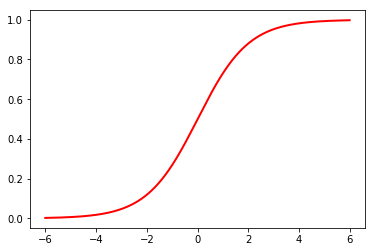

In [8]:
def draw_sigmoid():
    x = np.arange(-6, 6, .01)
    y = sigmoid(x)

    plt.plot(x, y, color='red', lw=2)
    plt.show()

draw_sigmoid()

when we replace z with $\theta x$, we get the model function.

$\hat{y}=\frac{1}{1 + e^{- \theta x}}$

In [9]:
def model(theta, X):
    z = np.sum(theta.T * X, axis=1)
    return sigmoid(z)

## Loss Function

In [10]:
#cross_entropy
def cross_entropy(y, y_hat):
    n_samples = y.shape[0]
    return sum(-y*np.log(y_hat)-(1-y)*np.log(1-y_hat))/n_samples

def cost_function(theta, X, y):
    y_hat = model(theta, X)
    return cross_entropy(y, y_hat)

## Optimizer

Let us name the lost function as **J**

$J= - y * log(\hat{y}) - (1-y) * log(1-\hat{y})$

So the devivative of J will be:

$\frac{\partial J}{\partial \theta} = - \frac{\partial (y * log(\hat{y}) + (1-y) * log(1-\hat{y}))}{\partial \theta}$

$ = - \frac{\partial (y * log(\hat{y}))}{\partial \theta} - \frac{\partial  ((1-y) * log(1-\hat{y}))}{\partial \theta}$

$ = - y * \frac{\partial log(\hat{y})}{\partial \theta} - (1-y) * \frac{log(1-\hat{y})}{\partial \theta}$

$ = - \frac{y}{\hat{y}} *\frac{\partial \hat{y}}{\partial \theta} - \frac{1-y}{1-\hat{y}} *\frac{\partial (1-\hat{y})}{\partial \theta}$

$ = - \frac{y}{\hat{y}} *\frac{\partial \hat{y}}{\partial \theta} + \frac{1-y}{1-\hat{y}} *\frac{\partial (\hat{y})}{\partial \theta}$

$ = (- \frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}} ) * \frac{\partial (\hat{y})}{\partial \theta}$

$ = (- \frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}} ) * \frac{\partial (\frac{1}{1 + e^{- \theta x}})} {\partial a}$

$ = (- \frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}} ) * (- \hat{y} ^ 2) \frac{\partial (1 + e^{- \theta x})} {\partial \theta}$

$ = (- \frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}} ) * (- \hat{y} ^ 2) \frac{\partial (e^{- \theta x})} {\partial \theta}$

$ = (- \frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}} ) * (- \hat{y} ^ 2) * e^{- \theta x} \frac{\partial (- \theta x)} {\partial \theta}$

$ = (- \frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}} ) * \hat{y} ^ 2 * e^{- \theta x} * x $

∵  $\hat{y}=\frac{1}{1 + e^{- \theta x}}$ 

∴  $1 + e^{- \theta x}=\frac{1}{\hat{y}}$ 

∴  $e^{- \theta x}=\frac{1}{\hat{y}} - 1$ 

∴  $e^{- \theta x}=\frac{1-\hat{y}}{\hat{y}}$ 

$\frac{\partial J}{\partial \theta} = (- \frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}} ) * \hat{y} ^ 2 * \frac{1-\hat{y}}{\hat{y}} * x$

$\frac{\partial J}{\partial \theta} = (- \frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}} ) * \hat{y} * (1-\hat{y}) * x$

$\frac{\partial J}{\partial \theta} = (- y * (1-\hat{y}) + (1-y) * \hat{y} ) * x$

$\frac{\partial J}{\partial \theta} = (- y + y *\hat{y} + \hat{y}-y * \hat{y} ) * x$

$\frac{\partial J}{\partial \theta} = (\hat{y}-y ) * x$

Thus the optimizer will be:

$\theta = \theta - \alpha * \frac{\partial J}{\partial \theta}$

$\theta = \theta - \alpha * (\hat{y}-y ) * x$

Let us write the code of it.

In [11]:
def optimize(theta,X,y):
    n = X.shape[0]
    alpha = 1e-1
    y_hat = model(theta,X)
    dtheta = (1.0/n) * ((y_hat-y)*X)
    dtheta = np.sum(dtheta, axis=0)
    dtheta=dtheta.reshape((31,1))
    theta = theta - alpha * dtheta
    return theta

## Evaluation
We evaluate the performance of classification algorithms by accuracy. You can also use ROC, recall, precision, F1 score and so on. But here I just use accuracy. Three functions are given. The first calcuate $\hat{y}$, which is a number between 0 and 1. The second function use the result of the first function and 

In [12]:
def predict_proba(theta, X):
    y_hat=model(theta, X)
    return y_hat

def predict(X, theta):
    y_hat=predict_proba(theta,X)
    y_hard=(y_hat > 0.5) * 1
    return y_hard

def accuracy(theta, X, y):
    y_hard=predict(X, theta)
    count_right=sum(y_hard == y)
    return count_right*1.0/len(y)

## Iterations

In [39]:
def iterate(theta,X,y,times):
    costs = []
    accs = []
    for i in range(times):
        theta = optimize(theta,X,y)
        costs.append(cost_function(theta, X, y))
        accs.append(accuracy(theta, X, y))

    return theta, costs, accs

# Prepare Data
Load Data

In [40]:
X = dataset.data
y = dataset.target
n_features = X.shape[1]

Data Normalization

In [41]:
std=X.std(axis=0)
mean=X.mean(axis=0)
X_norm = (X - mean) / std

Append ones at the beginning of each row of matrix.

In [42]:
def add_ones(X):
    ones=np.ones((X.shape[0],1))
    X_with_ones=np.hstack((ones, X))
    return X_with_ones

In [43]:
X_with_ones = add_ones(X_norm)

Split Train and test data

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_with_ones, y, test_size = 0.3, random_state=12345)
y_train=y_train.reshape((y_train.shape[0],1))
y_test=y_test.reshape((y_test.shape[0],1))

# Apply Algorithm

In [45]:
theta = np.ones((n_features+1,1))

In [46]:
theta, costs, accs = iterate(theta, X_train, y_train, 1500)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


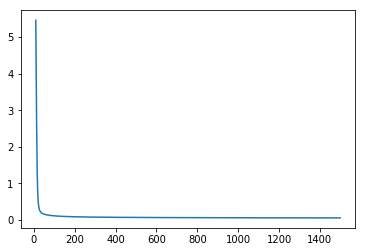

In [53]:
plt.plot(costs)

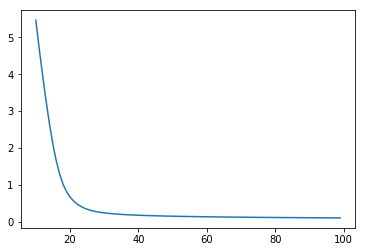

In [56]:
plt.plot(costs[:100])

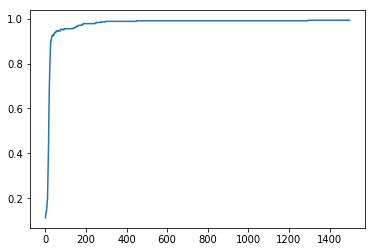

In [54]:
plt.plot(accs)

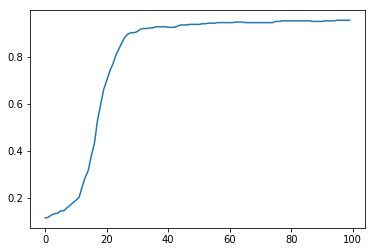

In [51]:
plt.plot(accs[:100])

Apply model to test data.

In [52]:
print(costs[-1], accs[-1])

[0.0489982] [0.99246231]


In [21]:
accuracy(theta, X_test, y_test)

array([0.97660819])

# Use sklearn

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X_with_ones, y, test_size = 0.3, random_state=12345)

In [24]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
lr.score(X_train, y_train)

0.992462311557789

In [26]:
lr.score(X_test, y_test)

0.9766081871345029

In [27]:
lr.intercept_

array([0.16188044])

In [28]:
lr.coef_[0]

array([ 0.16188044, -0.35607225, -0.51732699, -0.38050215, -0.45233913,
       -0.34296444,  0.3498612 , -0.88317445, -0.99814281, -0.06963982,
        0.27916329, -1.06875966,  0.09017138, -0.76342139, -0.75020754,
        0.32578214,  1.15876839, -0.07459907, -0.49088402,  0.06566515,
        0.7962668 , -0.79499813, -0.87404419, -0.75630483, -0.82259933,
       -0.73091925,  0.13404571, -0.88450734, -0.83173228, -0.5178612 ,
       -0.4865363 ])

In [29]:
data_compare = pd.DataFrame()

In [30]:
data_compare['features'] = np.hstack((['bias'], data.columns[:-1]))
data_compare['sklearn'] = lr.coef_[0]
data_compare['mine'] = (theta) 

In [31]:
data_compare

,features,sklearn,mine
0,bias,0.161880,0.660577
1,mean radius,-0.356072,-0.417717
2,mean texture,-0.517327,-0.686624
3,mean perimeter,-0.380502,-0.465461
4,mean area,-0.452339,-0.417080
5,mean smoothness,-0.342964,-0.506114
6,mean compactness,0.349861,-0.089967
7,mean concavity,-0.883174,-0.952097
8,mean concave points,-0.998143,-1.069773
9,mean symmetry,-0.069640,-0.202518


# Interpretatoin

$\hat{y}=\frac{1}{1 + e^{- \theta x}}$ 

If $\theta=0$, then $e^{- \theta x}=1$ and $\hat{y}=0.5$

If $\theta$ is positive, then $e^{- \theta x}<1$ and $\hat{y}>0.5$

∴ $-\theta x = \frac{1-\hat{y}}{\hat{y}}$ 

|$\theta$ | $e^{- \theta x}$ | $\hat{y}$|interpretatoin|
|--:|--:|--:|--:|
| 0 | 1 | 0.5 |x has no impect over y|
| positive | decreate when x increase | increate |y increase when x increase|
| negative | increate when x increase | decreate |y decrease when x increase|

For feature 1 (mean radius), because it is negative, so the bigger mean radius is, the more likely y is 0, or to say the cancer is likely malignant.

